In [76]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [77]:
def custom_cmap():
	red = np.array([255, 54, 54, 255])/255
	green = np.array([64, 255, 77, 255])/255
	white = np.array([1,1,1,1])
	ph_fun = lambda x, shift:1/(1+2**(-60*(x-shift)))
	res = 512
	arr_cmap = []
	for i in np.linspace(0,1,res):
		if i < 0.5:
			ph = ph_fun(i, 0.45)
			c = red * (1 - ph) + white * ph
		else :
			ph = ph_fun(i, 0.55)
			c = green * ph + white * (1-ph)
		arr_cmap.append(c)

	cmap = colors.ListedColormap(arr_cmap)
	cmap.set_bad(color='black')
	return cmap

cmap = custom_cmap()

def heatmap(data, row_labels, col_labels, ax, top=True, **kwargs):
	im = ax.imshow(cmap(data), **kwargs)

	ax.set_xticks(np.arange(data.shape[1]))
	ax.set_yticks(np.arange(data.shape[0]))

	# if top:
	# 	for i in range(data.shape[0]):
	# 		for j in range(data.shape[1]):
	# 			ax.text(j, i, data[i, j], ha="center", va="center", **{"fontsize":3})

	ax.set_xticklabels(col_labels, fontdict={"fontsize": 8, 'verticalalignment': 'center'})
	ax.set_yticklabels(row_labels, fontdict={"fontsize": 7, 'verticalalignment': 'center'})

	if top:
		ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, left=False, labelleft=False, right=True, labelright=True)
		plt.setp(ax.get_xticklabels(), rotation=315, ha="right", va="center", rotation_mode="anchor")
	else:
		ax.tick_params(top=False, bottom=False, labeltop=False, labelbottom=False, left=False, labelleft=False, right=True, labelright=True)
	ax.grid(which="minor", color="w", linestyle='', linewidth=0)
	
	return im

def draw_sep(ax, x, y, size, txt):
	arrow = {"arrowstyle": "-"}
	ax.annotate('', xy=(x,-0.03), xycoords='axes fraction', xytext=(x, y + 0.03), textcoords='axes fraction', arrowprops=arrow)
	ax.annotate('', xy=(x-size,0), xycoords='axes fraction', xytext=(x+size, 0), textcoords='axes fraction', arrowprops=arrow)
	ax.annotate('', xy=(x-size,y), xycoords='axes fraction', xytext=(x+size, y), textcoords='axes fraction', arrowprops=arrow)
	ax.annotate(txt, xy=(x,y/2), xycoords='axes fraction', xytext=(x, y/2), textcoords='axes fraction', va="center", **{"fontsize": 8, "rotation":-90})

def table(data, ax, vs='', xcoord=1.485):
	for i, d in enumerate(data):
		txtweight = "bold" if float(d[:-1]) > 50 else "normal"
		ax.annotate(d, xy=(0,i), xytext=(-0.7, i), textcoords='data', **{"fontsize": 7, "weight":txtweight}, ha="right", va='center')
	draw_sep(ax, xcoord, 1, 0.01, vs)

def perc_comp(data):
	count = tot = 0
	for i in range(data.shape[0]):
		if not np.isnan(data[i]):
			tot += 1
			if data[i] > 0.5:
				count += 1
	return round(100*count/tot, 1)


# Single function experiments

## Metric: best of the run

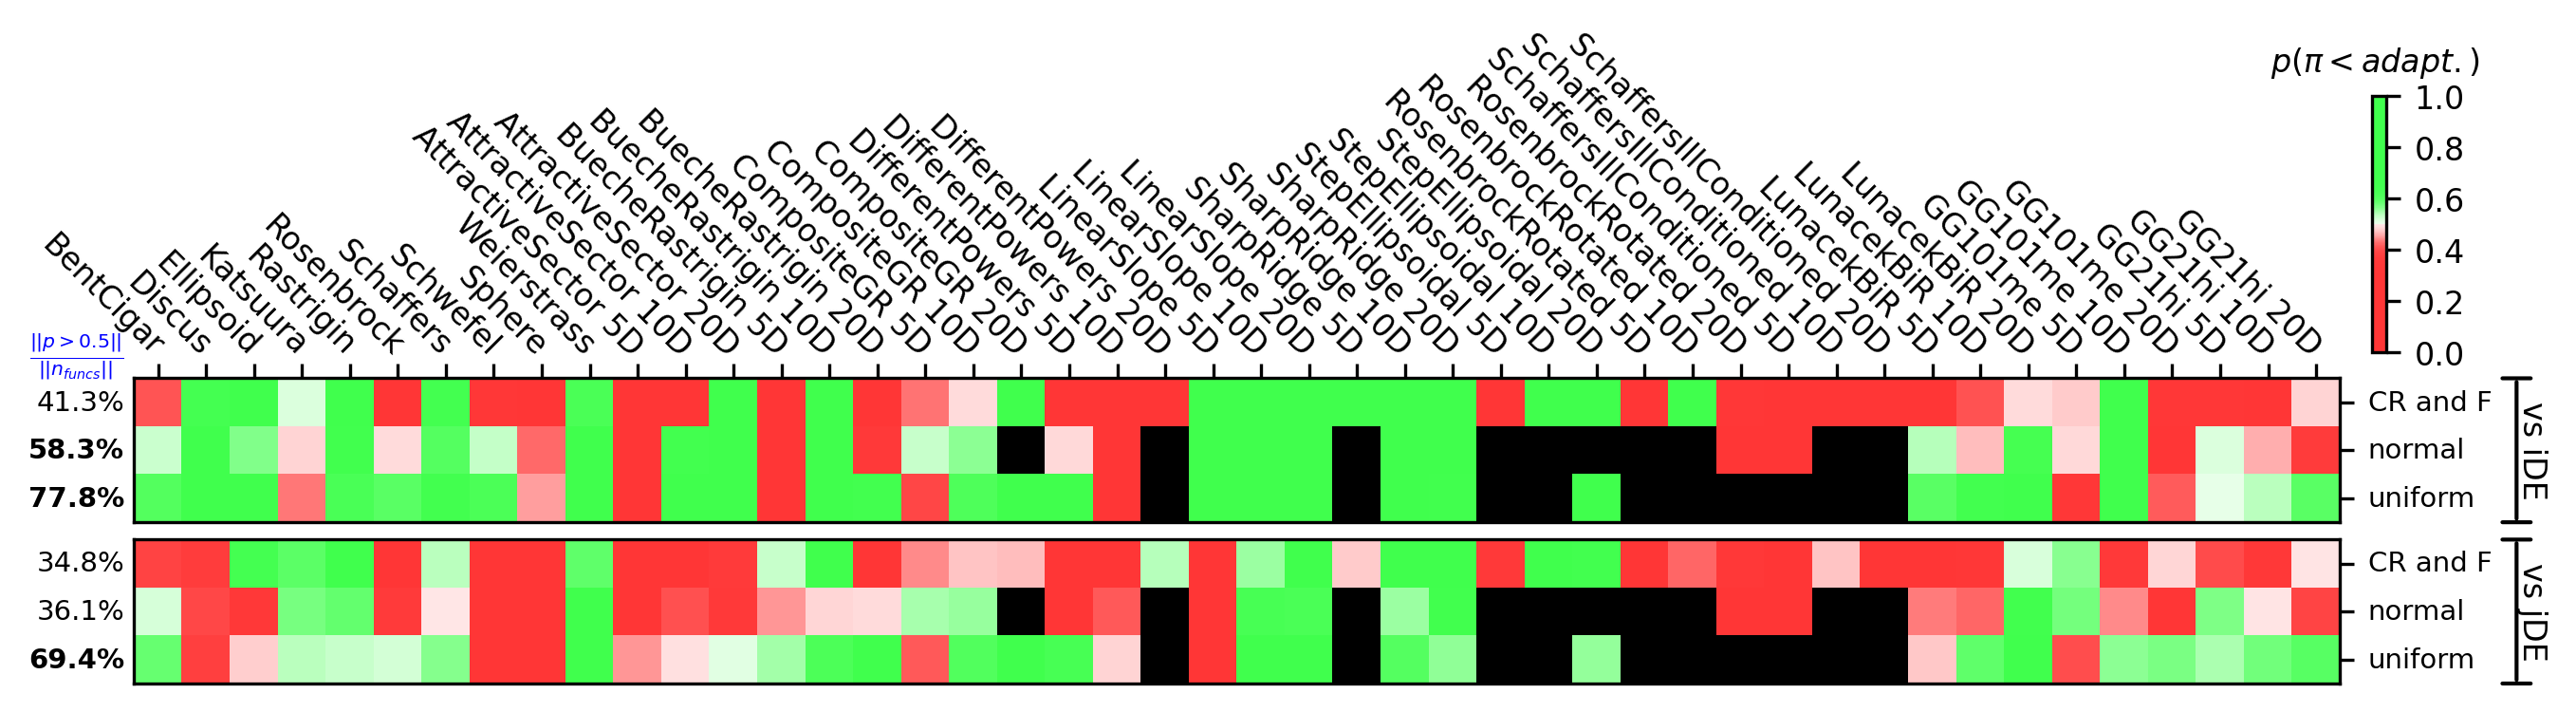

In [78]:
df1 = pd.read_csv("DE_single_CR_and_F.csv")
df2 = pd.read_csv("DE_single_normal.csv")
df3 = pd.read_csv("DE_single_uniform.csv")

functions = df1["Function"].to_list()
functions = list(map(lambda x: str.replace(x, "_", " "), functions))

labels = np.array(["CR and F", "normal", "uniform"])

data = np.empty((46, 3))
data[:,0] = df1["Best iDE"].to_numpy()
data[:,1] = df2["Best iDE"].to_numpy()
data[:,2] = df3["Best iDE"].to_numpy()

data2 = np.empty((46, 3))
data2[:,0] = df1["Best jDE"].to_numpy()
data2[:,1] = df2["Best jDE"].to_numpy()
data2[:,2] = df3["Best jDE"].to_numpy()

fig, ax = plt.subplots(figsize=(10,1.5), nrows=2)#, gridspec_kw={'height_ratios': [1, 1]})
axins = inset_axes(ax[0], width=0.05, height=0.9, loc='upper right', bbox_transform=ax[0].transAxes, bbox_to_anchor=(0.03, 2.1, 1, 1))
plt.subplots_adjust(hspace=0)
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=1), cmap=cmap), cax=axins)
cbar.set_label('$p(\pi < adapt.)$', **{"rotation":"horizontal", "position":(0,1.2), "ha":"right", "fontsize": 8})
cbar.set_ticks([0,0.2,0.4,0.6,0.8,1])
cbar.ax.tick_params(labelsize=8) 
kwards = {
    "cmap": cmap,
}
arrow = {
    "arrowstyle":'-[, widthB=1.8, lengthB=1.',
    "lw":1.0
}
bbox = {
    "pad":2.5,
    "alpha":1,
    "fc": [1,1,1]
}
heatmap(data.T, labels, functions, ax[0], top=True, **kwards)
heatmap(data2.T, labels, functions, ax[1], top=False, **kwards)
fig.text(0.105,0.895,"$\\frac{||p>0.5||}{||n_{funcs}||}$", fontsize=7, c="blue", ha="center")
table([f"{perc_comp(data[:,i]):.1f}%" for i in range(3)], ax[0], 'vs iDE', 1.08)
table([f"{perc_comp(data2[:,i]):.1f}%" for i in range(3)], ax[1], 'vs jDE', 1.08)

## Metric: Area under the curve

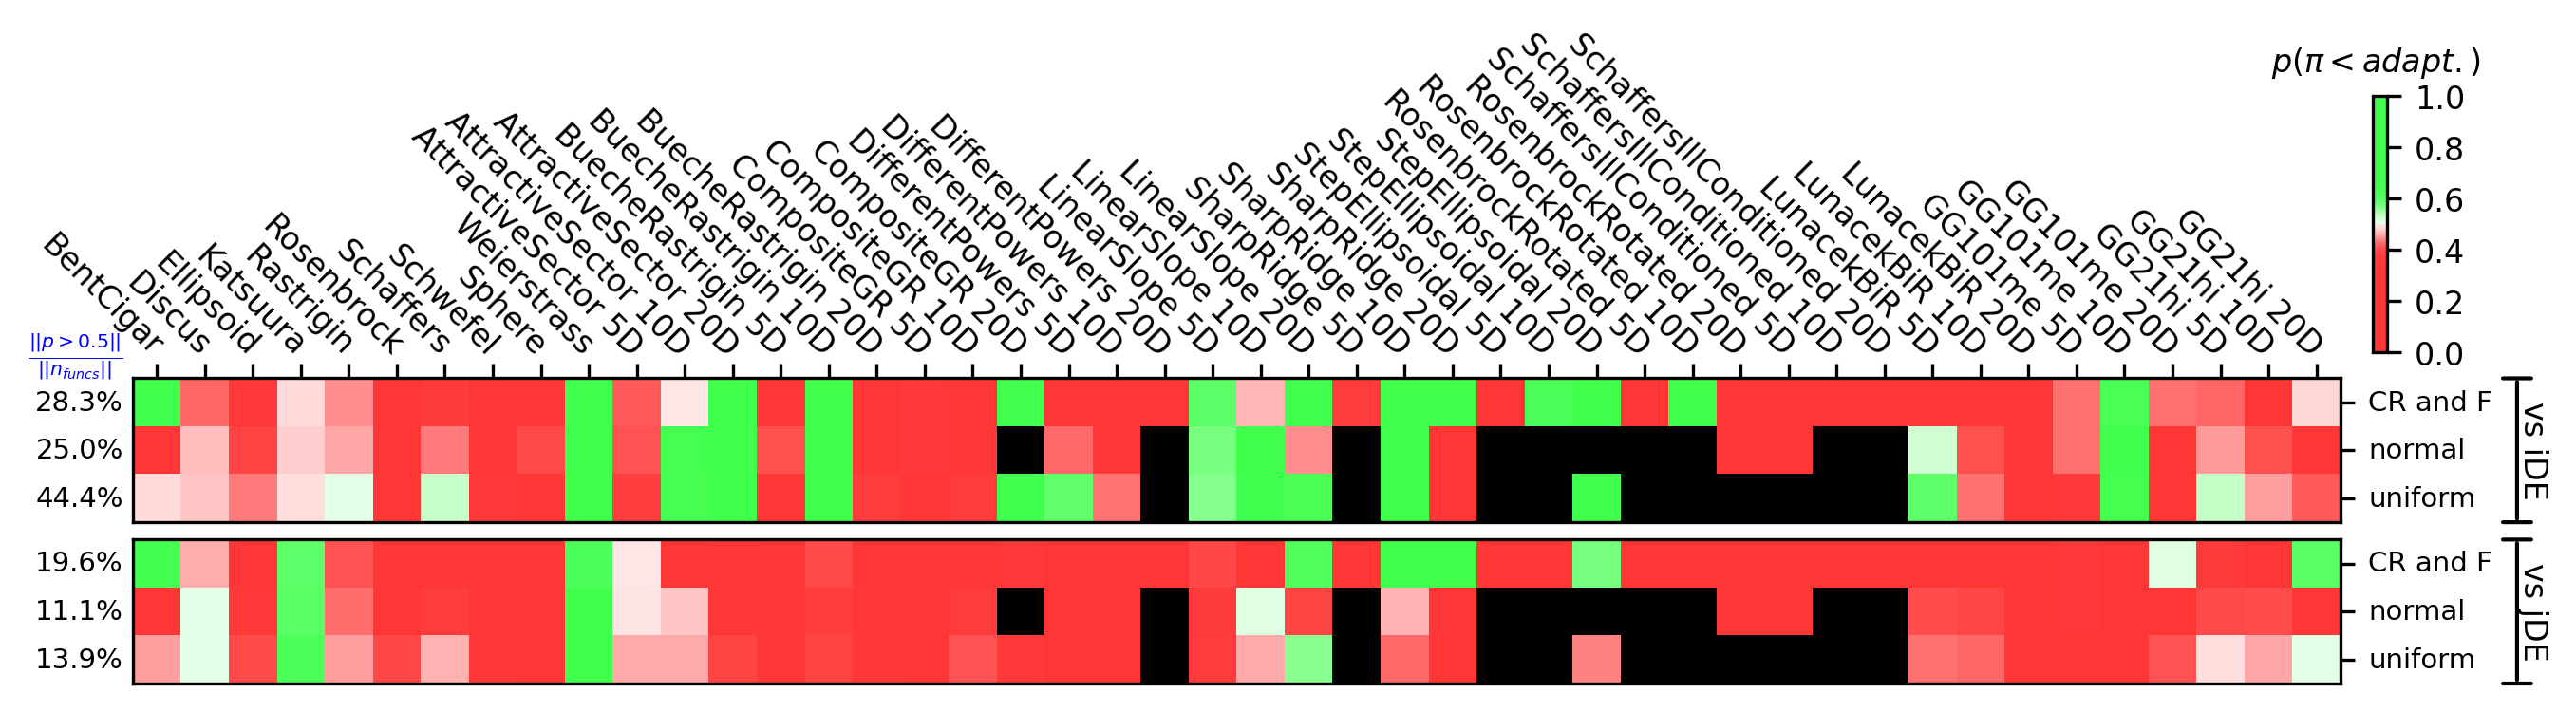

In [79]:
data = np.empty((46, 3))
data[:,0] = df1["AUC iDE"].to_numpy()
data[:,1] = df2["AUC iDE"].to_numpy()
data[:,2] = df3["AUC iDE"].to_numpy()

data2 = np.empty((46, 3))
data2[:,0] = df1["AUC jDE"].to_numpy()
data2[:,1] = df2["AUC jDE"].to_numpy()
data2[:,2] = df3["AUC jDE"].to_numpy()

fig, ax = plt.subplots(figsize=(10,1.5), nrows=2)#, gridspec_kw={'height_ratios': [1, 1]})
axins = inset_axes(ax[0], width=0.05, height=0.9, loc='upper right', bbox_transform=ax[0].transAxes, bbox_to_anchor=(0.03, 2.1, 1, 1))
plt.subplots_adjust(hspace=0)
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=1), cmap=cmap), cax=axins)
cbar.set_label('$p(\pi < adapt.)$', **{"rotation":"horizontal", "position":(0,1.2), "ha":"right", "fontsize": 8})
cbar.set_ticks([0,0.2,0.4,0.6,0.8,1])
cbar.ax.tick_params(labelsize=8) 
kwards = {
    "cmap": cmap,
}
arrow = {
    "arrowstyle":'-[, widthB=1.8, lengthB=1.',
    "lw":1.0
}
bbox = {
    "pad":2.5,
    "alpha":1,
    "fc": [1,1,1]
}
heatmap(data.T, labels, functions, ax[0], top=True, **kwards)
heatmap(data2.T, labels, functions, ax[1], top=False, **kwards)
fig.text(0.105,0.895,"$\\frac{||p>0.5||}{||n_{funcs}||}$", fontsize=7, c="blue", ha="center")

table([f"{perc_comp(data[:,i]):.1f}%" for i in range(3)], ax[0], 'vs iDE', 1.08)
table([f"{perc_comp(data2[:,i]):.1f}%" for i in range(3)], ax[1], 'vs jDE', 1.08)

# Multi function experiments

In [80]:
map_file = [
    ('DE_multi_gauss.csv','inter Δf and prec. action'),
    ('DE_multi_gauss_wIntraDeltaX.csv','w/ intra ΔX'),
    ('DE_multi_gauss_wIntraDeltaF.csv','w/ intra Δf'),
    ('DE_multi_gauss_wIntraDeltaF_IntraDeltaX.csv','w/ intra Δf + intra ΔX'),
    ('DE_multi_gauss_wIntraDeltaF_IntraDeltaX_InterDeltaX.csv','w/ intra Δf + intra ΔX + inter ΔX'),
    ('DE_multi_gauss_wIntraDeltaF_IntraDeltaX_moretrain.csv','w/ intra Δf + intra ΔX (double training)'),
    ('DE_multi_gauss_wIntraDeltaF_IntraDeltaX_InterDeltaX_moretrain.csv','w/ intra Δf + intra ΔX + inter ΔX (double training)'),
    ('DE_multi_gauss_wIntraDeltaF_IntraDeltaX_big_moretrain.csv','w/ intra Δf + intra ΔX (bigger net & double train)'),
    ('DE_multi_gauss_wIntraDeltaF_IntraDeltaX_InterDeltaX_big_moretrain.csv','w/ intra Δf + intra ΔX + inter ΔX(bigger net & double train)'),
    ('DE_multi_unif.csv','inter Δf and prec. action'),
    ('DE_multi_unif_wIntraDeltaX.csv','w/ intra ΔX'),
    ('DE_multi_unif_wIntraDeltaF.csv','w/ intra Δf'),
    ('DE_multi_unif_wIntraDeltaF_IntraDeltaX.csv','w/ intra Δf + intra ΔX'),
    ('DE_multi_unif_wIntraDeltaF_IntraDeltaX_InterDeltaX.csv','w/ intra Δf + intra ΔX + inter ΔX'),
    ('DE_multi_unif_wIntraDeltaF_IntraDeltaX_moretrain.csv','w/ intra Δf + intra ΔX (double training)'),
    ('DE_multi_unif_wIntraDeltaF_IntraDeltaX_InterDeltaX_moretrain.csv','w/ intra Δf + intra ΔX + inter ΔX (double training)'),
    ('DE_multi_unif_wIntraDeltaF_IntraDeltaX_big_moretrain.csv','w/ intra Δf + intra ΔX (bigger net & double train)'),
    ('DE_multi_unif_wIntraDeltaF_IntraDeltaX_InterDeltaX_big_moretrain.csv','w/ intra Δf + intra ΔX + inter ΔX(bigger net & double train)'),
]

## Metric: best of the run

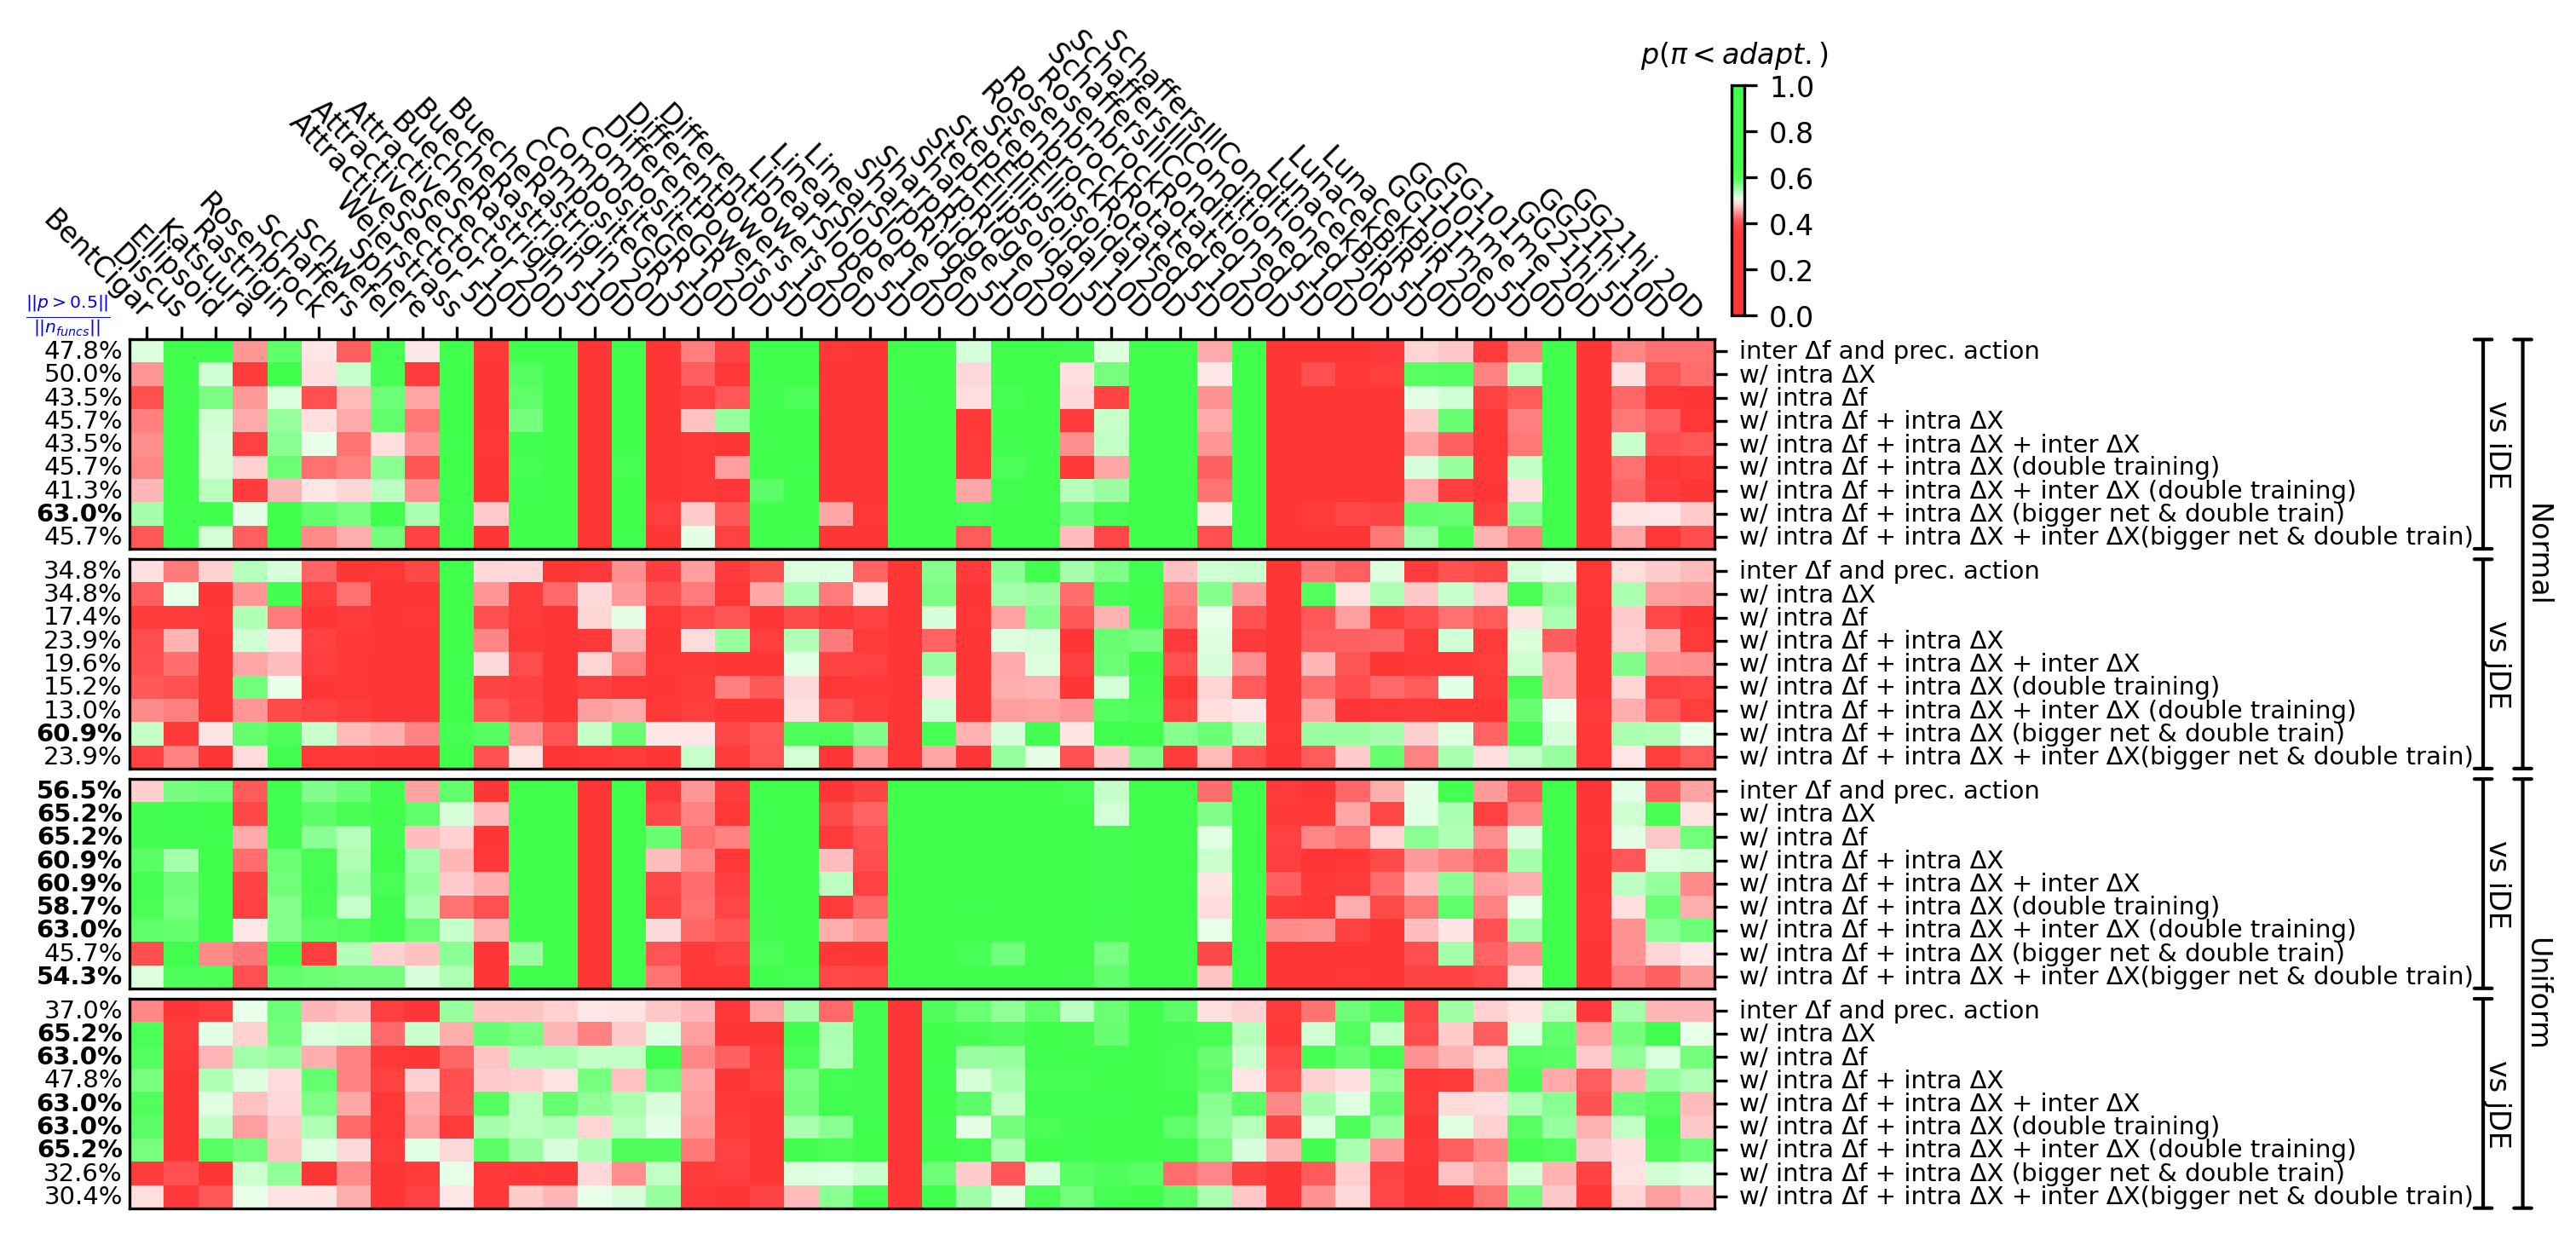

In [84]:
import os
mpl.rcParams['figure.dpi'] = 300
rows = [{},{},{},{}]
functions = pd.read_csv("DE_multi_unif.csv")["Function"].to_list()
filelist = os.listdir()
filelist.sort()
for file in filelist:
    if "multi" in file:
        if "gauss" in file:
            rows[0][file] = pd.read_csv(file)["Best iDE"].to_numpy()
            rows[1][file] = pd.read_csv(file)["Best jDE"].to_numpy()
        if "unif" in file:
            rows[2][file] = pd.read_csv(file)["Best iDE"].to_numpy()
            rows[3][file] = pd.read_csv(file)["Best jDE"].to_numpy()
            
functions = list(map(lambda x: str.replace(x, "_", " "), functions))
labels = [map_file[i][1] for i in range(9)]

data1 = np.array([rows[0][map_file[i][0]] for i in range(9)])
data2 = np.array([rows[1][map_file[i][0]] for i in range(9)])
data3 = np.array([rows[2][map_file[i+9][0]] for i in range(9)])
data4 = np.array([rows[3][map_file[i+9][0]] for i in range(9)])

fig, ax = plt.subplots(figsize=(8,4.5), nrows=4)
axins = inset_axes(ax[0], width=0.05, height=0.9, loc='upper right', bbox_transform=ax[0].transAxes, bbox_to_anchor=(0.03, 1.3, 1, 1))
plt.subplots_adjust(hspace=0.05, wspace=0.1)
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=1), cmap=cmap), cax=axins)
cbar.set_label('$p(\pi < adapt.)$', **{"rotation":"horizontal", "position":(0,1.2), "ha":"right", "fontsize": 8})
cbar.set_ticks([0,0.2,0.4,0.6,0.8,1])
cbar.ax.tick_params(labelsize=8)
kwards = {
    # "cmap": cmap,
    "aspect":"auto"
}
heatmap(data1, labels, functions, ax[0], top=True, **kwards)
heatmap(data2, labels, functions, ax[1], top=False, **kwards)
heatmap(data3, labels, functions, ax[2], top=False, **kwards)
heatmap(data4, labels, functions, ax[3], top=False, **kwards)
table([f"{perc_comp(data1[i]):.1f}%" for i in range(9)], ax[0], "vs iDE")
table([f"{perc_comp(data2[i]):.1f}%" for i in range(9)], ax[1], "vs jDE")
table([f"{perc_comp(data3[i]):.1f}%" for i in range(9)], ax[2], "vs iDE")
table([f"{perc_comp(data4[i]):.1f}%" for i in range(9)], ax[3], "vs jDE")
fig.text(0.095,0.895,"$\\frac{||p>0.5||}{||n_{funcs}||}$", fontsize=7, c="blue", ha="center")
draw_sep(ax[1], 1.51, 2.05, 0.01, "Normal")
draw_sep(ax[3], 1.51, 2.05, 0.01, "Uniform")

## Metric: Area under the curve

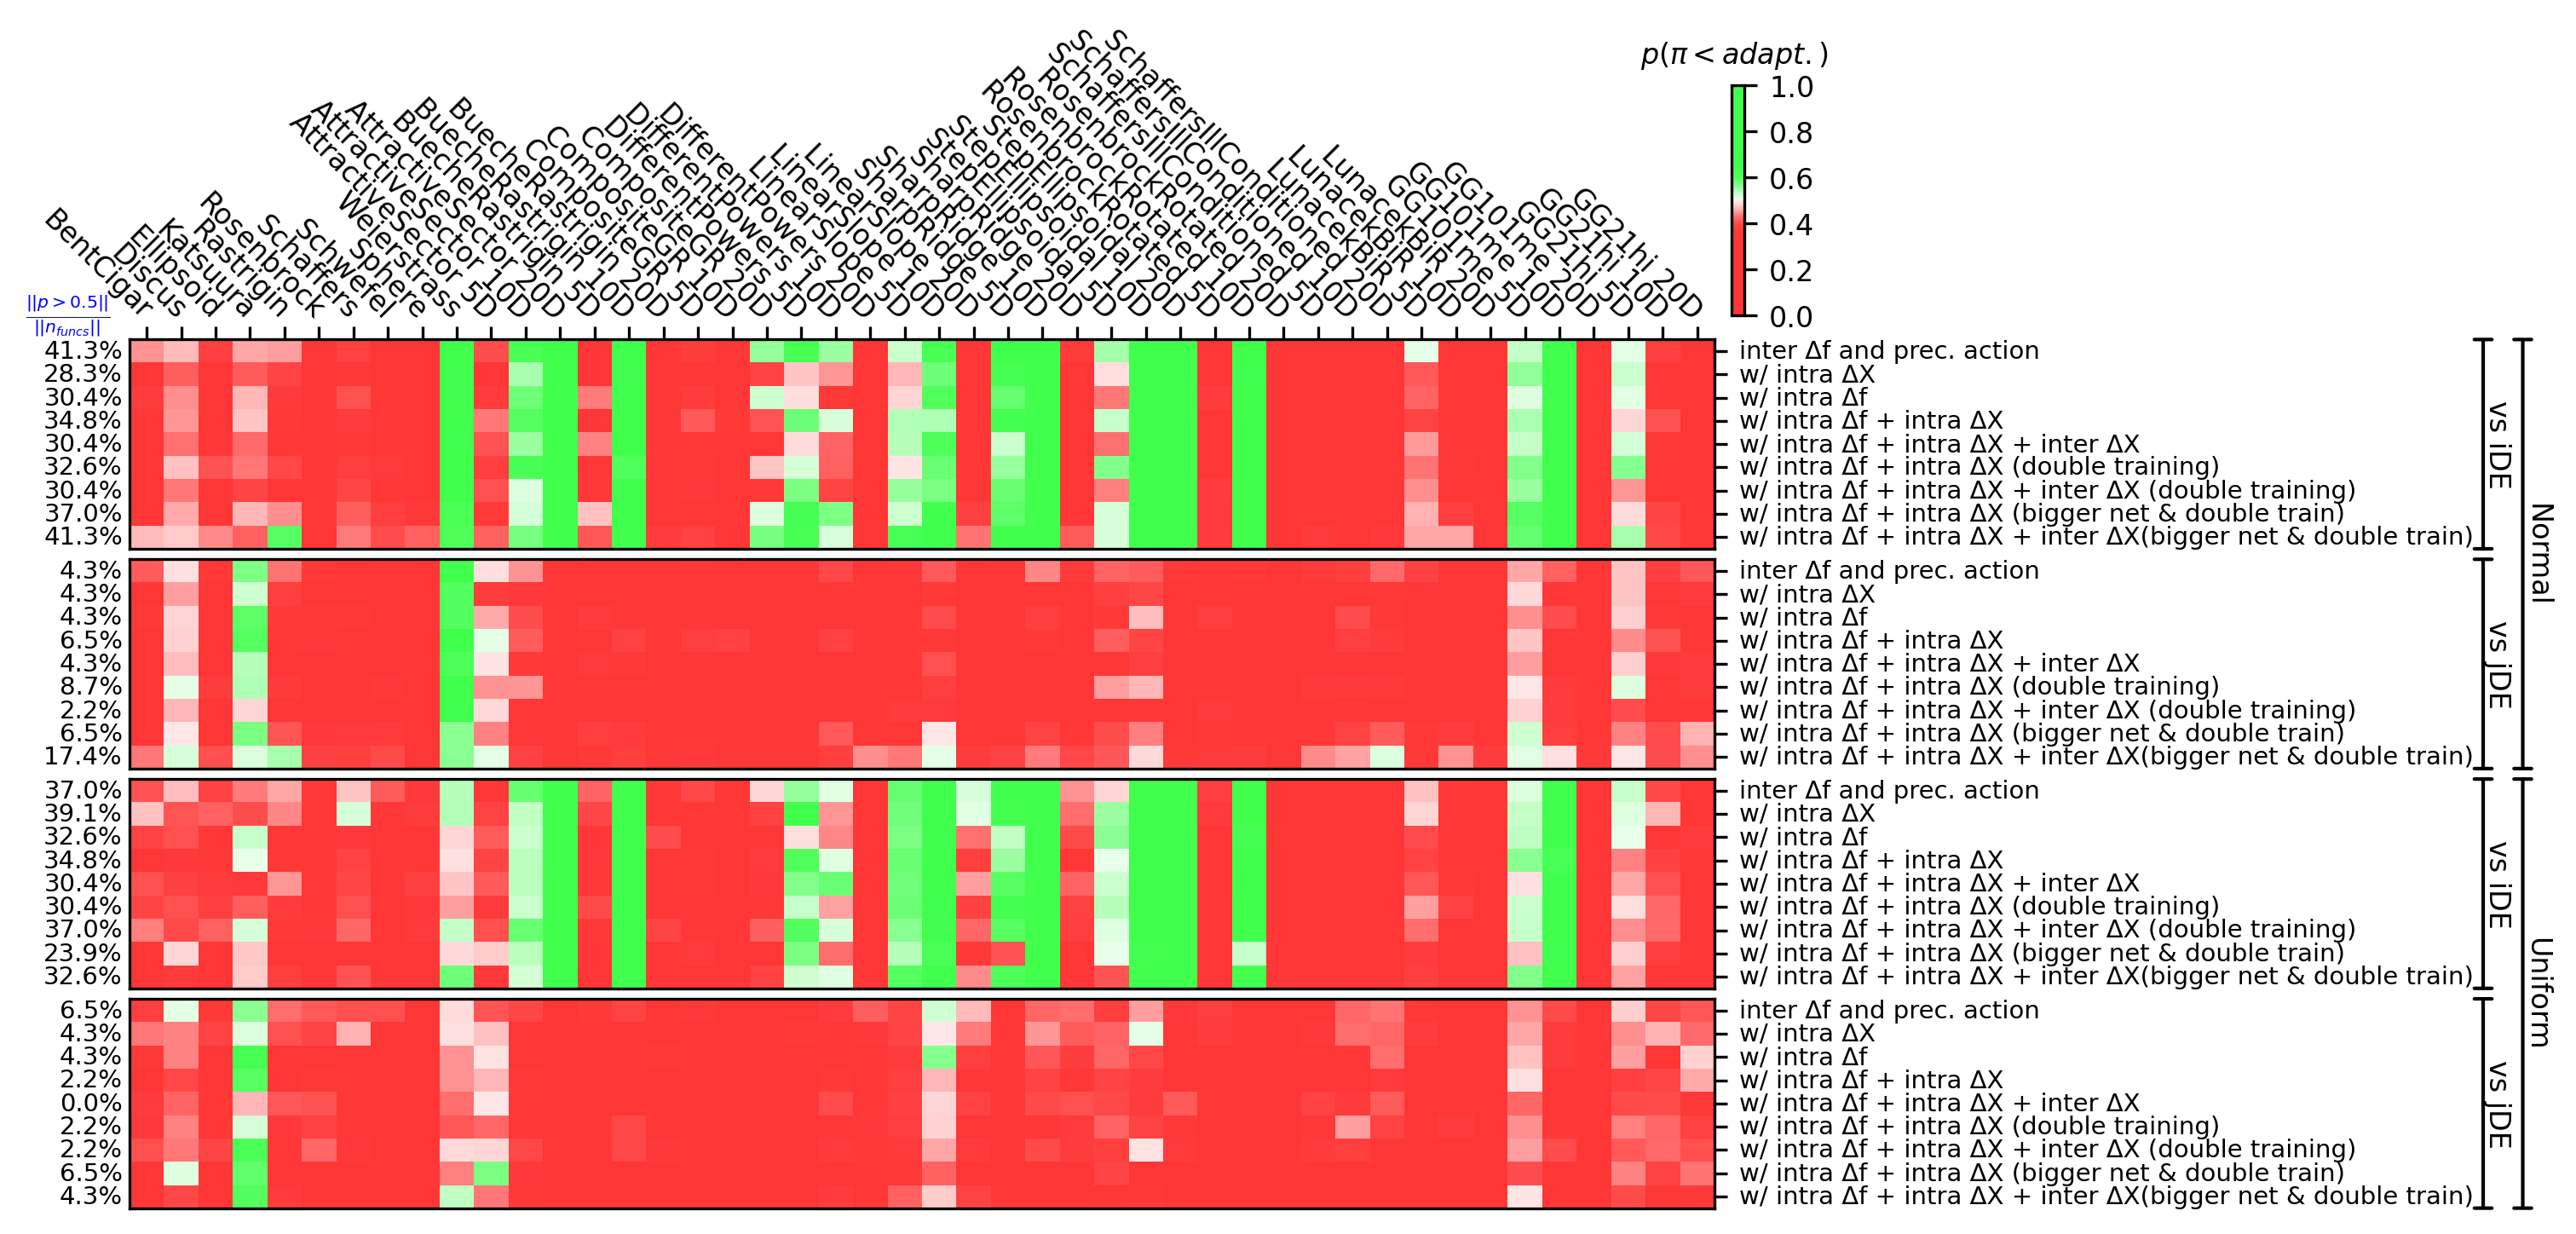

In [85]:
rows = [{},{},{},{}]
functions = pd.read_csv("DE_multi_unif.csv")["Function"].to_list()
filelist = os.listdir()
filelist.sort()
for file in filelist:
    if "multi" in file:
        if "gauss" in file:
            rows[0][file] = pd.read_csv(file)["AUC iDE"].to_numpy()
            rows[1][file] = pd.read_csv(file)["AUC jDE"].to_numpy()
        if "unif" in file:
            rows[2][file] = pd.read_csv(file)["AUC iDE"].to_numpy()
            rows[3][file] = pd.read_csv(file)["AUC jDE"].to_numpy()
            
functions = list(map(lambda x: str.replace(x, "_", " "), functions))
labels = [map_file[i][1] for i in range(9)]

data1 = np.array([rows[0][map_file[i][0]] for i in range(9)])
data2 = np.array([rows[1][map_file[i][0]] for i in range(9)])
data3 = np.array([rows[2][map_file[i+9][0]] for i in range(9)])
data4 = np.array([rows[3][map_file[i+9][0]] for i in range(9)])

fig, ax = plt.subplots(figsize=(8,4.5), nrows=4)
axins = inset_axes(ax[0], width=0.05, height=0.9, loc='upper right', bbox_transform=ax[0].transAxes, bbox_to_anchor=(0.03, 1.3, 1, 1))
plt.subplots_adjust(hspace=0.05, wspace=0.1)
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=1), cmap=cmap), cax=axins)
cbar.set_label('$p(\pi < adapt.)$', **{"rotation":"horizontal", "position":(0,1.2), "ha":"right", "fontsize": 8})
cbar.set_ticks([0,0.2,0.4,0.6,0.8,1])
cbar.ax.tick_params(labelsize=8)
kwards = {
    # "cmap": cmap,
    "aspect":"auto"
}
heatmap(data1, labels, functions, ax[0], top=True, **kwards)
heatmap(data2, labels, functions, ax[1], top=False, **kwards)
heatmap(data3, labels, functions, ax[2], top=False, **kwards)
heatmap(data4, labels, functions, ax[3], top=False, **kwards)
table([f"{perc_comp(data1[i]):.1f}%" for i in range(9)], ax[0], "vs iDE")
table([f"{perc_comp(data2[i]):.1f}%" for i in range(9)], ax[1], "vs jDE")
table([f"{perc_comp(data3[i]):.1f}%" for i in range(9)], ax[2], "vs iDE")
table([f"{perc_comp(data4[i]):.1f}%" for i in range(9)], ax[3], "vs jDE")
fig.text(0.095,0.895,"$\\frac{||p>0.5||}{||n_{funcs}||}$", fontsize=7, c="blue", ha="center")
draw_sep(ax[1], 1.51, 2.05, 0.01, "Normal")
draw_sep(ax[3], 1.51, 2.05, 0.01, "Uniform")